In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

age: Umur seseorang dalam tahun
sex: Jenis Kelamin (1 = pria, 0 = wanita)
cp: Nyeri dada yang dialami Jenis (1: tipikal nyeri dada (angina), Value 2: nyeri dada (angina) yang tidak biasa, Value 3: nyeri non-angina, Value 4: tanpa gejala) 
trestbps: Tekanan darah (mm Hg)
chol: Kolesterol seseorang (mg/dl)
fbs: Tingkat gula darah (> 120 mg/dl, 1 = true; 0 = false)
restecg: Pengukuran elektrokardiografi (0 = normal, 1 = memiliki sinyal ST-T yang tidak normal, 2 = menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri dengan kriteria Estes)
thalach: Detak jantung maksimal
exang: Latihan diinduksi angina (1 = ya; 0 = tidak)
oldpeak: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat ('ST' berhubungan dengan posisi pada plot EKG)
slope: kemiringan segmen ST latihan puncak (Nilai 1: miring ke atas, Nilai 2: datar, Nilai 3: miring ke bawah)
ca: Nomor dari banyaknya pembuluh (0-3)
thal: Penyakit kelainan darah yang disebut talasemia (3 = normal; 6 = cacat tetap; 7 = cacat reversibel)
target: Penyakit jantung (0 = tidak, 1 = ya)

In [3]:
# Read dataset
df = pd.read_csv('./heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# data info menunukkan bahwa data sudah bertipe numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# mengecek nilai null
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.shape

(1025, 14)

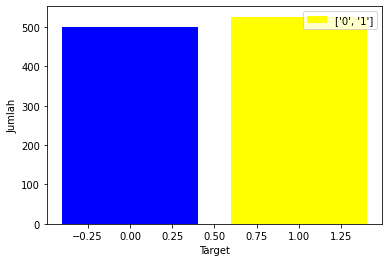

In [8]:
# visuasisasi perbandingan data target penyakit jantung
counts = df['target'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values, color=['yellow', 'blue'], label=['0', '1'])
ax.legend()
plt.show()

## Normalization

Metode normalisasi yang digunakan adalah Standard Scaler

In [9]:
# Memisahkan label dengan data target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
# Proses Normalisasi data menggunakan Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_df = pd.DataFrame(X, columns=df.iloc[:,:-1].columns)
X_scaled = pd.DataFrame(X)

In [11]:
# Hasil data yang sudah di normalisasi dengan standard scaler
X_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122


In [12]:
X

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

## Train Test Split

Pada tahap ini data akan dipecah menjadi 2 bagian. Yang pertama merupakan data train, yang nantinya data tersebut akan di latih oleh model yang akan digunakan. Lalu yang kedua adalah data test, yang mana data ini akan diuji untuk menemukan hasil akurasinya. Persentase data test yang akan digunakan adalah 20% dari keseluruhan data.

In [14]:
X_train, X_test , y_train , y_test = train_test_split (X_scaled, y, test_size = 0.2, random_state =0)

In [15]:
# ignore warning
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

## Build Model and Cross Validation

Di tahap ini adalah prooses pembuatan pipeline untuk algoritma yang akan digunakan. Setelah itu akan dilakukkan cross validation menggunakan K-Fold dengan jumlah split sebesar 10.

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection

# pembuatan model
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('Neural Network', MLPClassifier(solver='lbfgs', max_iter=2000, random_state=1, hidden_layer_sizes=(5,2))))

results = []
names = []

# cross validation using K-Fold
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=5, shuffle=True)
  cv_res = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  print(cv_res)
  results.append(cv_res)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_res.mean(), cv_res.std())
  print(msg)

[0.84146341 0.8902439  0.82926829 0.81707317 0.82926829 0.7195122
 0.80487805 0.80487805 0.79268293 0.84146341]
Naive Bayes: 0.817073 (0.041535)
[0.90243902 0.91463415 0.92682927 0.92682927 0.91463415 0.87804878
 0.8902439  0.91463415 0.84146341 0.93902439]
SVM: 0.904878 (0.027160)
[0.87804878 0.86585366 0.85365854 0.82926829 0.85365854 0.7804878
 0.79268293 0.80487805 0.80487805 0.87804878]
KNN: 0.834146 (0.034579)
[0.93902439 0.93902439 0.95121951 0.93902439 0.90243902 0.96341463
 0.8902439  0.93902439 0.93902439 0.92682927]
Neural Network: 0.932927 (0.020588)


Berikut adalah boxplot hasil cross validation sebanyak 10 kali. Dan bisa dilihat bahwa Neural Network memiliki akurasi yang tinggi jika dibandingkan dengan algoritma lainnya.

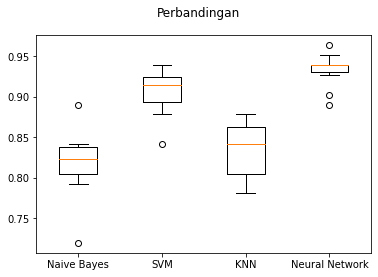

In [17]:
fig = plt.figure()
fig.suptitle('Perbandingan')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Sekarang dilakukannya uji data train yang sudah dibuat tadi dengan pipeline model dari ke-empat algoritma machine learning.

In [18]:
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(name, ":")
  print('Accuracy: ', accuracy_score(y_test, y_pred))
  print('Precision: ', precision_score(y_test, y_pred))
  print('Recall: ', recall_score(y_test, y_pred))
  print('F1: ',  f1_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

Naive Bayes :
Accuracy:  0.8536585365853658
Precision:  0.8347826086956521
Recall:  0.897196261682243
F1:  0.8648648648648648
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

SVM :
Accuracy:  0.9658536585365853
Precision:  0.9464285714285714
Recall:  0.9906542056074766
F1:  0.9680365296803651
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        98
           1       0.95      0.99      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205

KNN :
Accuracy:  0.8780487804878049
Precision:  0.8727272727272727
Recall:  0.897196261682243
F1:  0.

Bisa dilihat SVM dan Neural Network memiliki akurasi diatas 90%.

## Dimensional Reduction

Setelah melakukan uji data sebelumnya. kali ini kami akan mencoba untuk melakukkan dimensional reduction untuk mencari fitur dengan variasi yang rendah. Metode yang akan digunakan adalah Principal Component Analysis (PCA).

In [19]:
# proces dimensional reduction dengan PCA tanpa adanya pengurangan komponen
from sklearn.decomposition import PCA
n_components = None
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
data_pca = pca.transform(X_scaled)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.522556,-1.112803,0.956816,-1.149198,-0.559252,-1.505052,0.071292,0.049732,0.872570,-0.417433,-0.558838,-0.356376,-0.117908
1,2.590381,-0.533162,1.467315,1.536614,1.345335,1.524630,1.469460,0.594801,-0.127561,-1.139650,-0.654299,-0.855773,0.281303
2,3.042352,-1.327521,-0.424765,1.567204,0.283814,-0.738182,0.378211,-1.397097,-0.836844,-0.450680,-0.519250,-0.896456,0.947188
3,-0.492522,-0.276720,0.801442,-0.984277,-0.487587,-1.438634,0.385833,-1.566671,0.085219,-0.425601,-0.989851,-0.243456,0.340277
4,2.187464,1.951477,-0.385539,0.295793,-2.386144,-0.563839,1.022689,1.682067,0.451377,-0.534908,-0.721091,1.069638,-0.614242


In [20]:
# variasi tiap fitur pada dataset
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[21.36991246 11.97195897  9.23838416  8.99403943  7.68592509  7.47956911
  6.74178512  5.90757775  5.58414212  4.84968333  4.01735359  3.32041963
  2.83924924]



In [21]:
# jumalah variasi kumulatif dari dataset keseluruhan
print("Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Variances (Percentage):
[ 21.36991246  33.34187142  42.58025558  51.57429502  59.2602201
  66.73978921  73.48157433  79.38915208  84.9732942   89.82297754
  93.84033113  97.16075076 100.        ]



Text(0, 0.5, 'Explained variance (%)')

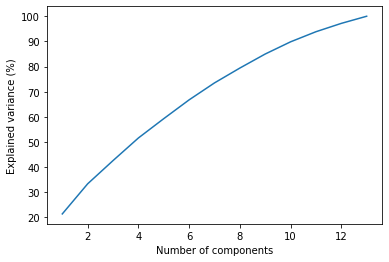

In [22]:
# grafik variasi kumulatif
components = len(pca.explained_variance_ratio_)
components = components \
    if components is None else components
    
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Sekarang coba gunakan 95% dari dataset sebagai komponen

In [23]:
# proces dimensional reduction dengan PCA
n_components = 0.95
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
data_pca = pca.transform(X_scaled)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.522556,-1.112803,0.956816,-1.149198,-0.559252,-1.505052,0.071292,0.049732,0.872570,-0.417433,-0.558838,-0.356376
1,2.590381,-0.533162,1.467315,1.536614,1.345335,1.524630,1.469460,0.594801,-0.127561,-1.139650,-0.654299,-0.855773
2,3.042352,-1.327521,-0.424765,1.567204,0.283814,-0.738182,0.378211,-1.397097,-0.836844,-0.450680,-0.519250,-0.896456
3,-0.492522,-0.276720,0.801442,-0.984277,-0.487587,-1.438634,0.385833,-1.566671,0.085219,-0.425601,-0.989851,-0.243456
4,2.187464,1.951477,-0.385539,0.295793,-2.386144,-0.563839,1.022689,1.682067,0.451377,-0.534908,-0.721091,1.069638


In [24]:
# variasi tiap fitur pada dataset
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[21.36991246 11.97195897  9.23838416  8.99403943  7.68592509  7.47956911
  6.74178512  5.90757775  5.58414212  4.84968333  4.01735359  3.32041963]



In [25]:
# jumalah variasi kumulatif dari dataset keseluruhan
print("Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Variances (Percentage):
[21.36991246 33.34187142 42.58025558 51.57429502 59.2602201  66.73978921
 73.48157433 79.38915208 84.9732942  89.82297754 93.84033113 97.16075076]



Text(0, 0.5, 'Explained variance (%)')

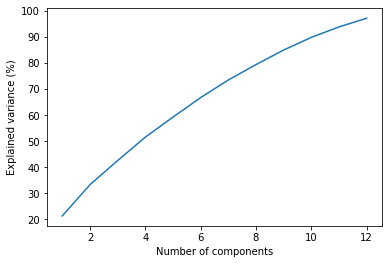

In [26]:
# grafik variasi kumulatif
components = len(pca.explained_variance_ratio_)
components = components \
    if components is None else components
    
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Split train test lagi untuk data yang sudah di kecilkan. Sama seperti sebelumnya, jumlah data testnya sebesar 20% dari keseluruhan dataset

In [27]:
X_train, X_test , y_train , y_test = train_test_split (data_pca, y, test_size = 0.2, random_state =0)

In [28]:
# implementasi cross validation untuk data yang dikecilkan
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=5, shuffle=True)
  cv_res = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  print(cv_res)
  results.append(cv_res)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_res.mean(), cv_res.std())
  print(msg)

[0.82926829 0.87804878 0.82926829 0.80487805 0.81707317 0.75609756
 0.80487805 0.80487805 0.82926829 0.84146341]
Naive Bayes: 0.819512 (0.029772)
[0.90243902 0.91463415 0.8902439  0.90243902 0.87804878 0.90243902
 0.8902439  0.91463415 0.84146341 0.93902439]
SVM: 0.897561 (0.024512)
[0.82926829 0.85365854 0.86585366 0.81707317 0.85365854 0.84146341
 0.7804878  0.80487805 0.80487805 0.86585366]
KNN: 0.831707 (0.027702)
[0.95121951 0.91463415 0.92682927 0.93902439 0.91463415 0.96341463
 0.91463415 0.93902439 0.92682927 0.97560976]
Neural Network: 0.936585 (0.020260)


sama seperti saat sebelum dikecilkan. Neural Network masih memiliki akurasi yang paling tinggi, yaitu diatas 90%

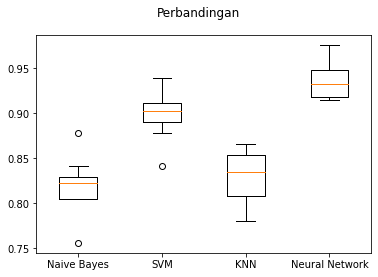

In [29]:
# visualisasi box plot untuk hasil akurasi tiap algoritma
fig = plt.figure()
fig.suptitle('Perbandingan')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Naive Bayes :
Accuracy:  0.8439024390243902


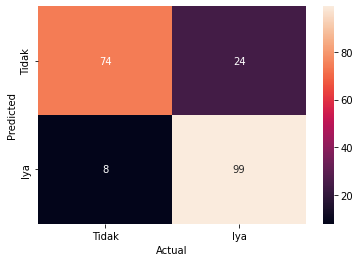

Precision:  0.8048780487804879
Recall:  0.9252336448598131
F1:  0.8608695652173913
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        98
           1       0.80      0.93      0.86       107

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205

SVM :
Accuracy:  0.9560975609756097


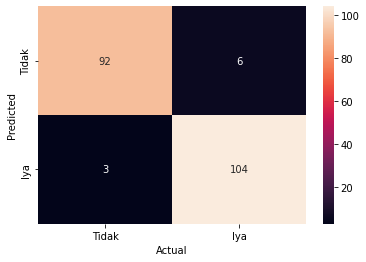

Precision:  0.9454545454545454
Recall:  0.9719626168224299
F1:  0.9585253456221198
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        98
           1       0.95      0.97      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

KNN :
Accuracy:  0.8731707317073171


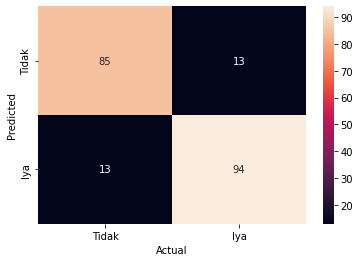

Precision:  0.8785046728971962
Recall:  0.8785046728971962
F1:  0.8785046728971962
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        98
           1       0.88      0.88      0.88       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Neural Network :
Accuracy:  0.9707317073170731


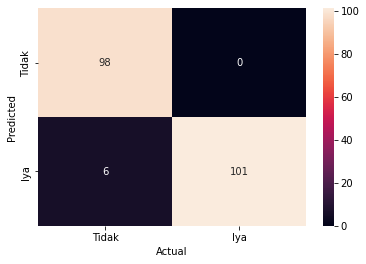

Precision:  1.0
Recall:  0.9439252336448598
F1:  0.9711538461538461
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        98
           1       1.00      0.94      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [32]:
# proses uji data untuk setiap algoritma yang digunakan dan mencari akurasi, precision, recall, dan f1-scorenya
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(name, ":")
  print('Accuracy: ', accuracy_score(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  ax = sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Tidak', 'Iya'], yticklabels=['Tidak', 'Iya'])
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()
  print('Precision: ', precision_score(y_test, y_pred))
  print('Recall: ', recall_score(y_test, y_pred))
  print('F1: ',  f1_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))